# Multiple Linear Regression - OLS Method
## Insurance Charge Prediction

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# reading dataset
dataset = pd.read_csv('insurance.csv')

In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dataset.shape

(1338, 7)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


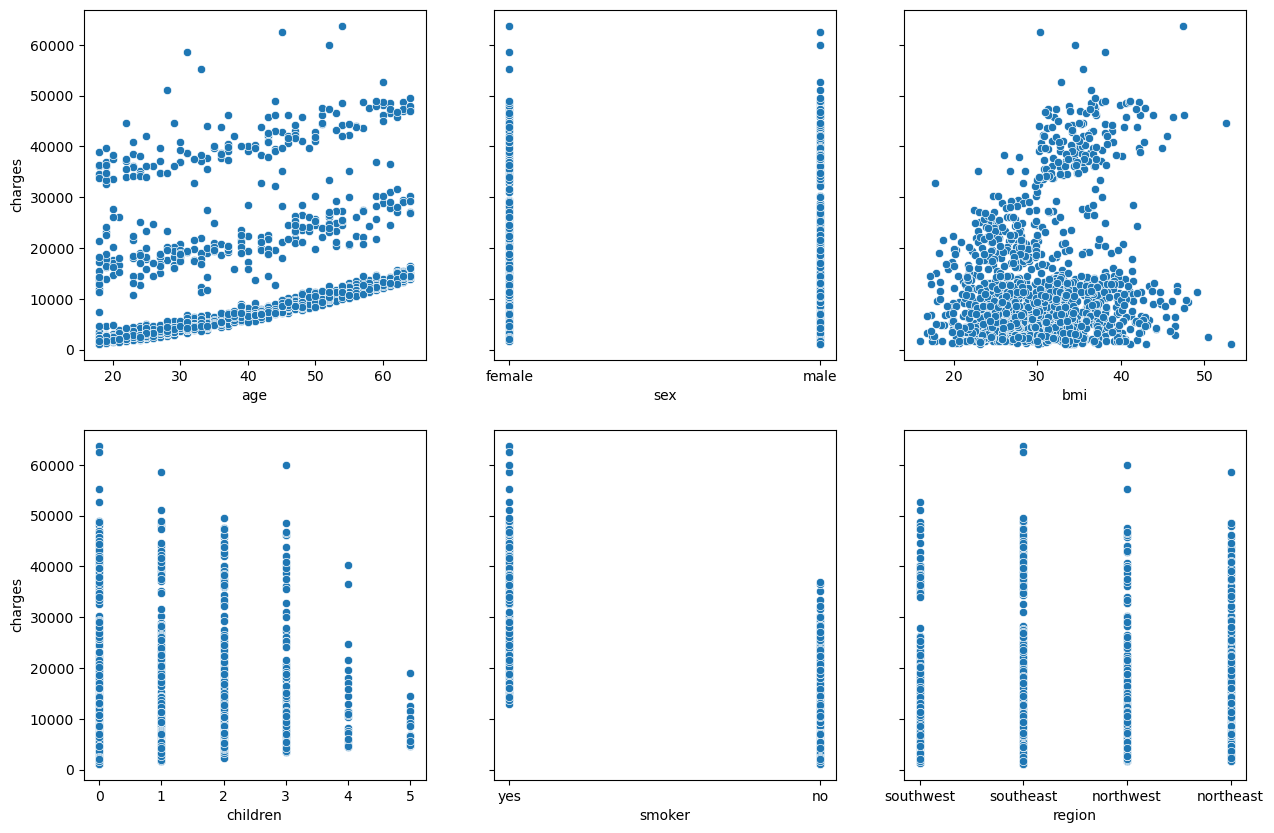

In [10]:
# knowing the relation between dependent and indepandent variables
fig, axes = plt.subplots(2,3, figsize=(15,10),sharey=True)
sns.scatterplot(x='age', y='charges', data=dataset, ax=axes[0][0])
sns.scatterplot(x='sex', y='charges', data=dataset, ax=axes[0][1])
sns.scatterplot(x='bmi', y='charges', data=dataset, ax=axes[0][2])
sns.scatterplot(x='children', y='charges', data=dataset, ax=axes[1][0])
sns.scatterplot(x='smoker', y='charges', data=dataset, ax=axes[1][1])
sns.scatterplot(x='region', y='charges', data=dataset, ax=axes[1][2])

plt.show()

- from the above charts we can understand that the insurance charges not depends on person's sex, children, and region
- insurance charges mainly depands on person's age, bmi, and smoking habit

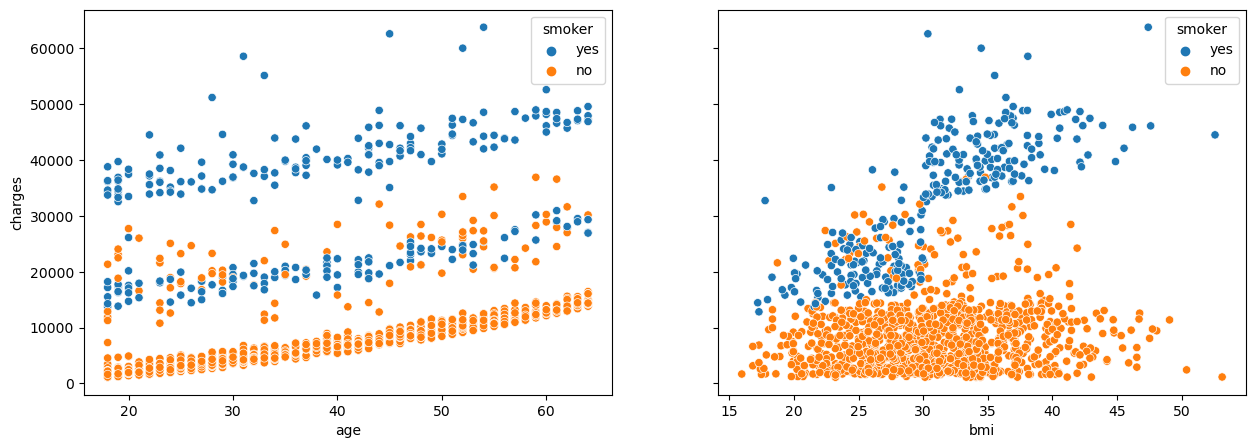

In [13]:
# finding the relation between charges and age, bmi based on smoking habit
fig, axes = plt.subplots(1,2, figsize=(15,5),sharey=True)
sns.scatterplot(x='age', y='charges', data=dataset, hue='smoker', ax=axes[0])
sns.scatterplot(x='bmi', y='charges', data=dataset, hue='smoker', ax=axes[1])

plt.show()

In [15]:
# creating new dataset with the required features
df = dataset[['age','bmi','smoker','charges']]
df.head()

,age,bmi,smoker,charges
0,19,27.900,yes,16884.92400
1,18,33.770,no,1725.55230
2,28,33.000,no,4449.46200
3,33,22.705,no,21984.47061
4,32,28.880,no,3866.85520


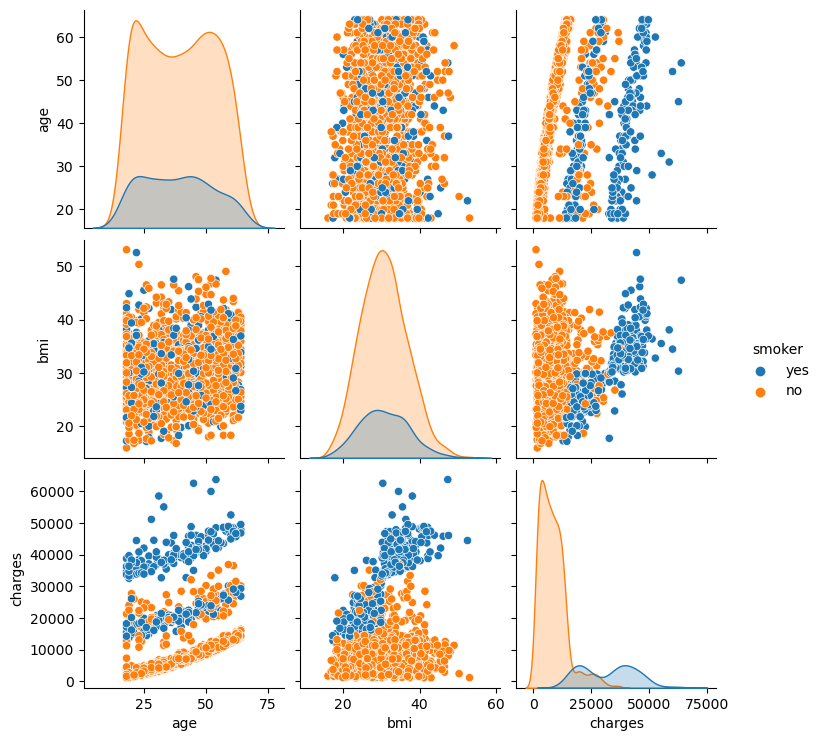

In [16]:
sns.pairplot(vars=['age','bmi','charges'], data=df, diag_kind='kde', hue='smoker')
plt.show()

In [21]:
# converting categorical data into numerical using OneHotEncoder
import category_encoders as ce
encoder = ce.OneHotEncoder(use_cat_names=True)
df_en = encoder.fit_transform(df)
df_en = df_en.drop(['smoker_no'],axis=1)
df_en.head()

,age,bmi,smoker_yes,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [23]:
df_corr = df_en.corr()
df_corr

,age,bmi,smoker_yes,charges
age,1.000000,0.109272,-0.025019,0.299008
bmi,0.109272,1.000000,0.003750,0.198341
smoker_yes,-0.025019,0.003750,1.000000,0.787251
charges,0.299008,0.198341,0.787251,1.000000


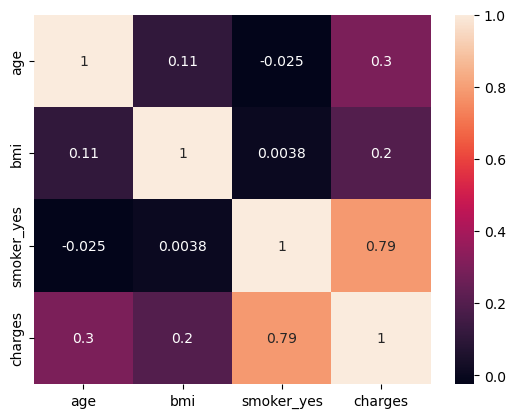

In [25]:
sns.heatmap(df_corr,annot=True)
plt.show()

In [27]:
# separating independent variable and response variable from dataset
X = df_en.iloc[:,:-1].values
y = df_en.iloc[:,-1].values

In [30]:
# spliting the dataset into training set and testing set 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [52]:
# building linear regression model with OLS method
import statsmodels.api as sm
X_train_ols = sm.add_constant(X_train)
result = sm.OLS(y_train,X_train_ols).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     981.8
Date:                Wed, 31 May 2023   Prob (F-statistic):          3.90e-306
Time:                        15:03:30   Log-Likelihood:                -10857.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1066   BIC:                         2.174e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.157e+04   1055.832    -10.960      0.000   -1.36e+04   -9500.163
x1           257.0407     13.527     19.002      0.000     230.498     283.583
x2           321.8400     30.770     10.459      0.000     261.463     382.217
x3          2.363e+04    469.229     50.349      0.000    2.27e+04    2.45e+04
==============================================================================
Omnibus:                      255.491   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              608.017
Skew:                           1.279   Prob(JB):                    9.35e-133
Kurtosis:                       5.664   Cond. No.                         287.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# getting the intercept and coefficients of the model
intercept, coef1, coef2, coef3 = result.params
intercept, coef1, coef2, coef3

(-11571.908016839909, 257.0406660167603, 321.839977190738, 23625.234488337217)

In [55]:
# defining a function to predict insurance charges
def insurance_charge(age,bmi,smoker):
    charge = intercept + coef1*age + coef2*bmi + coef3*smoker
    return charge

In [57]:
# randomly picking a data from X_test and predicting its charge
random_pick = np.random.randint(X_test.shape[0],size=1)
for age,bmi,smoker in X_test[random_pick]:
    amount = insurance_charge(age,bmi,smoker)
    if smoker == 0:
        smoker_y_n = 'No'
    else:
        smoker_y_n = 'Yes'
    print(f'Insurance Charge predicted for person with Age:{age}, BMI:{bmi}, Smoker:{smoker_y_n} is {round(amount,5)}')

Insurance Charge predicted for person with Age:42.0, BMI:26.125, Smoker:No is 7631.86936
